# Example 2.1: PO_LF_LM_RG
Pull-out of a long fiber from long rigid matrix

@author: rosoba

## Observation
Let us try to utilize the depicted idealization for the derivation of a model that can help us simulate the test results of the RILEM pull-out test
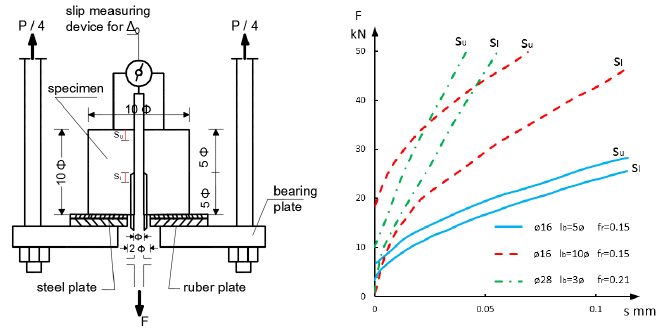

## Idealization of the pull-out problem
This notebook explains the derivation of the pullout model and provides also its executable form.
The one-dimensional idealization of the pull-out is introduced in the figure

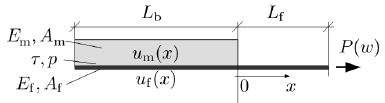

**Remark**: The origin of the coordinate system is placed at the transition between the bond zone and free zone of the fiber. The domain in the bond zone is defined as $x \in (-L_\mathrm{b},0)$. As a result, in the bond domain $x < 0$.

The meaning of the variables defining the idealization is summarized in the table

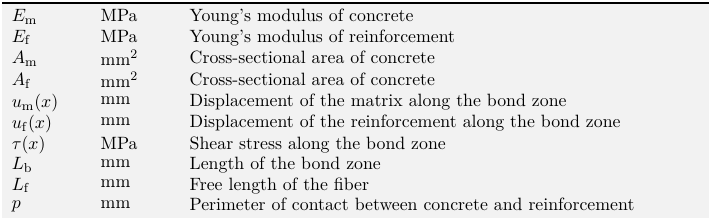

The pull-out test is controlled by the displacement at the end of the fiber $w$. 

The force $P$ is measured to obtain the pull-out curve $P(w)$

**Silly question:** What is the pull-out curve good for?

### Simplifications

Before referring to advanced possibilities how to solve this problem, let show that we can derive a rather simple, yet useful model by putting together the conditions of equilibrium, kinematics/compatibility and the constitutive laws of the components and their interface.  

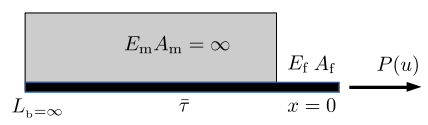

**Simplification 1:** The dimensions of the concrete block are 100 $\times$ 100 mm so that $A_\mathrm{m} = $10000 mm. Let us assume the diameter of the steel rebar 16 mm so that we get $A_\mathrm{f}$ = 201 mm. Considering Young's modulus of concrete $E_\mathrm{m}=$ 28 GPa and  of steel $E_\mathrm{f} = $ 210 GPa we see that the effective tensile stiffness of these components in the test reads
\begin{align}
E_\mathrm{m} A_\mathrm{m} &= 280000 \; \mathrm{kN/mm} \\
E_\mathrm{f} A_\mathrm{f} &=  42210 \; \mathrm{kN/mm} \\
\end{align}
The stiffness of concrete cross section is thus almost seven times larger than that of concrete. To simplify the construction of the model, let us assume that its stiffness infinite, i.e. $E_\mathrm{m} A_\mathrm{m} = \infty$. This means that $u_\mathrm{m}(x) = 0, \forall x \in (-L_\mathrm{b}, 0)$.

**Simplification 2:** Further, we assume that the interface between steel and concrete transfers a constant shear stress independently on the amount of slip, i.e.
\begin{align}
 \tau(s) = \bar{\tau}
\end{align}
were $\tau$ is a constant material parameter.

**Simplification 3:** We consider $L_\mathrm{b} = \infty$. Thus, the pull-out process can continue infinitely.

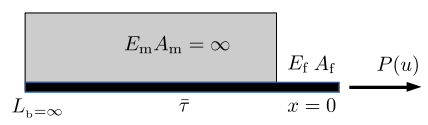

## Boundary value problem
This example shows the analytically solvable model - the simplest possible configuration of the pullout test.
By applying the simplifying assumptions, the model parameters specified in the table above reduce to the following symbols that we now define as variables within the `sympy` package. This will allow us to apply the `sympy` package to perform algebraic manipulation, to integrate and to differentiate automatically and concentrate on the model construction instead.

It is convenient to classify the parameters and variables involved in the model into the groups related to parameters describing the geometry, material behavior, measured response, internal state and subsidiary integration parameters that will be resolved during the model derivation. In this classification we also associate the mathematical symbols with the Python variable name introduced in the next cell.

**Geometrical variables:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `A_f` | $A_\mathrm{f}$ |  Cross section area modulus of the reinforcement |
| `p`   | $p$            |  Perimeter of the reinforcement                  |
| `L_b` | $L_\mathrm{b}$ |  Length of the bond zone of the pulled-out bar   |
| `x`   | $x$            |  Longitudinal coordinate |

**Material parameters:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `E_f`     | $E_\mathrm{f}$ |  Young's modulus of the reinforcement |
| `tau_bar` | $\bar{\tau}$   |  Frictional bond stress               |


**Control parameter:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `P` | $P$ | Pullout force |
| `w` | $w$ | pullout control  displacement

**State parameter:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `a` | $a$ | Length of the debonded zone |

**Integration constants:**

| Python | Parameter | Description | 
| :- | :-: | :- |
| `C`, `D` | $C,D$ | Integration constants to be resolved through boundary and continuity conditions |

**Let's import the packages:**

In [1]:
%matplotlib notebook
import sympy as sp # symbolic algebra package
import numpy as np # numerical package
import matplotlib.pyplot as plt # plotting package
sp.init_printing() # enable nice formating of the derived expressions
import ipywidgets as ipw

Here we tell `sympy` to remember these variables for further use. The parameter of the `symbols( str )` is a string that contains comma-separated printable symbol definition. One can use latex commands in this string to introduce e.g. Greek symbols like `\gamma, \beta`, etc. The number of symbols in `str` must be equal to the number of variables assigned on the left hand side of the `=` sign

In [2]:
E_f, A_f = sp.symbols(r'E_\mathrm{f}, A_\mathrm{f}', positive = True )
E_m, A_m = sp.symbols(r'E_\mathrm{m}, A_\mathrm{m}', positive = True )
tau, p = sp.symbols(r'\bar{\tau}, p', positive = True)
C, D = sp.symbols(r'C, D')
P, w = sp.symbols(r'P, w', positive=True)
x, a, L_b = sp.symbols(r'x, a, L_b')

## Infinitesimal bond segment
Let us now consider an infinitely small segment of the bond zone and employ the usual model ingredients, i.e. equilibrium, constitutive laws of the components and then the kinematics
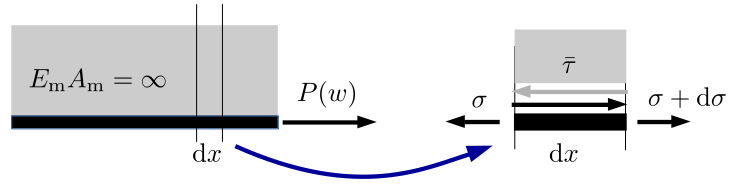

\begin{align}
\mathrm{d} \sigma_\mathrm{f} A_\mathrm{f} = p \bar{\tau} \, \mathrm{d}x
\end{align}

### Equilibrium 
In the halfspace $x \in (-\infty, 0)$ the governing equations take the folowing form:<br>

The equilibrium equation along the free length of the bar introduces the equivalence between the normal force in the reinforcement $\sigma_\mathrm{f} A_\mathrm{f}$ and and the bond intensity within an ifinitesimal element $\mathrm{d}x$
\begin{align}
\frac{\mathrm{d} \sigma_\mathrm{f}}{\mathrm{d} x} &= \frac{p \bar{\tau}}{A_\mathrm{f}}.
\end{align}

In [3]:
d_sig_f = p * tau / A_f
d_sig_f

We have expressed the derivative of tensile strain in the fiber in terms of the constant shear $\bar{\tau}$.
By integrating this expression we obtain the stress as 
\begin{align}
\sigma_\mathrm{f}(x) &= \int \frac{p\bar{\tau}}{A_\mathrm{f}} \, \mathrm{d}x = \frac{p \bar{\tau}}{A_\mathrm{f}} x + C
\end{align}
with $C$ as an unknown integration constant. In `sympy` we can issue the `sp.integrate` method to perform the automatic integration

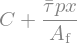

In [4]:
sig_f = sp.integrate(d_sig_f, x) + C
sig_f 

### Constitutive laws: 
Assuming linear elastic behavior with the Young's modulus $E_\mathrm{f}$ we obtain the strain $\varepsilon$ as
\begin{align}
\varepsilon_\mathrm{f}(x) = \frac{1}{E_\mathrm{f}} \sigma_{\mathrm{f}} = \frac{1}{E_\mathrm{f}} \left(\frac{p \tau}{A_\mathrm{f}} x + C \right).
\end{align}

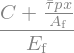

In [5]:
eps_f = sig_f / E_f
eps_f

### Kinematics: 
Realizing that
\begin{align}
\varepsilon_\mathrm{f} &= \frac{\mathrm{d} u}{\mathrm{d} x}
\implies 
u_\mathrm{f} = \int
\varepsilon_\mathrm{f} \mathrm{d} x
\end{align}
we obtain the displacement of the bar as an integral
\begin{align}
u_\mathrm{f}(x) &= 
\int 
\frac{1}{E_\mathrm{f}} \left(\frac{p \tau}{A_\mathrm{f}} x + C \right) \; \mathrm{d}x =
\frac{p \tau x^{2}}{2 A_\mathrm{f} E_\mathrm{f}} + \frac{C x}{E_{\mathrm{f}}} + D 
\end{align}

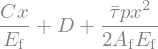

In [6]:
u_f = sp.integrate(eps_f, x) + D
u_f

**What's next?**

We obtained a function that describes the displacement along the bond zone $x < 0$. Moreover, it implicitly satisfies the local equilibrium conditions and constitutive laws in each material point. 

However, there are still two unknown integration constants $C$ and $D$. Thus, our local solution can be fulfilled for various boundary conditions. In other words, the obtained solution is valid no matter if we load the pull-out specimen on right or on the left hand side. To resolve these constants we have to find further equilibrium or compatibility conditions. 

## Resolving integration constants 
### Equilibrium at the loaded end
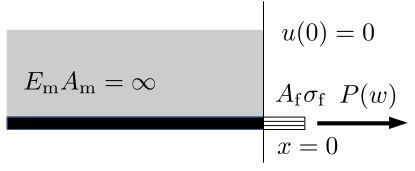

__Condition 1__: Stress in the free length must be equal to load over area: $\sigma_\mathrm{f}(0) = P/A_\mathrm{f} \; \implies \; P - \sigma_\mathrm{f}(0) A_\mathrm{f} = 0 \implies C = P / A_\mathrm{f}$

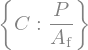

In [7]:
eq_C = {P - sig_f.subs({x:0}) * A_f}
C_subs = sp.solve(eq_C,C)   
C_subs # display the result

**`sympy` explanation**: Let us explain the two lines

__Line 1__: Defines the equation to solve $P - \sigma_\mathrm{f}(x=0) A_\mathrm{f} = 0$ in curly braces `{}`. The resulting data type is a set. Set is an unordered container. The set was assigned to a variable `eq_C`. 

__Line 2__: Then we used the `sp.solve` method available in `sympy` package with two parameters. The first parameter is the equation to solve `eq_C` and the second is the variable `C` that we want to resolve. The result is obtained in form of a dictionary defining a key-value pair of the variable and the resolved expression. 

### Compatibility condition requiring the continuity of slip
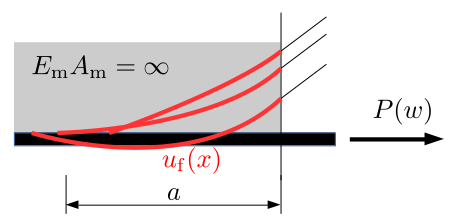

The solution for the integration constant $D$ requires a second thought. Can we say something about how does the displacement approach zero within the embedded length? The figure shows the geometrical meaning of the applied conditions. With condition 1 we required that the slope of the curve $u_\mathrm{f}$, i.e the stress must be equal to the external load. Thus all the parabolic curves must have the same slope at the point $x = 0$. Now the parameter $D$ can stretch and scale the curve along the $x$ axis. 

__Condition 2__: We can postulate, that at some unknown position $a < 0$, the slip between the reinforcement and the matrix will be zero, i.e. $u_\mathrm{f}(a) = 0$.

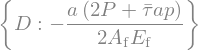

In [8]:
eqns_D = {u_f.subs(C_subs).subs(x,a)}
D_subs = sp.solve(eqns_D,D)
D_subs

**`sympy` explanation:** The function `u_f` still contains the unknown parameter $C$. Therefore, we substitute the solution from step 1 using the method `.subs` that replaces `C` by the solution. Let us do this step separately

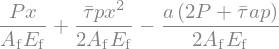

In [9]:
u_f.subs(C_subs).subs(D_subs) 

Thus, only $D$ remained to be resolved. Then, we substituted $x = a$ using again the `.subs` method with the first argument specifying the variable to be substituted and the second argument the value to substitute. Finally, the `sp.solve` method is used to get the resolved integration constant $D$.

### Compatibility condition requiring the continuity of slip
Well, we could get rid of $D$ but a new unknown appeared in form of $a$. Thus, the continuity postulate did not solve the problem. Another condition must be found to get rid of parameter $a$. Still, there is a subtle difference. We can associate $a$ with clear meaning that represents the state of our pull-out problem. It is the **debonded length**. Knowing this, it is easier to find the last condition: can we say something about how does the displacement approach zero at the end of the debonded length? 

__Condition 3__: We postulate, that also the strain $\varepsilon$ vanishes at the same distance $a$ as displacement reaches zero. i.e. $\varepsilon_\mathrm{f}(a) = 0$.

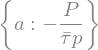

In [10]:
eqns_a = {eps_f.subs(C_subs).subs(D_subs).subs(x,a)}
a_subs = sp.solve(eqns_a,a)
a_subs

**sympy explanation:** The same methods of substitution and algebraic resolution were applied in the last step to resolve $a$

Now all the unknown parameters are resolved. Lets put them all into a single dictionary called var_subs for convenience to avoid long substitution expressions to derive $u_\mathrm{f}$, $\varepsilon_\mathrm{f}$ and $\sigma_\mathrm{f}$.

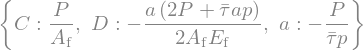

In [11]:
var_subs = {}
[var_subs.update(var) for var in [C_subs,D_subs,a_subs]]
var_subs

With the known values of integration parameters we can resolve the sought displacement fields and plot it 

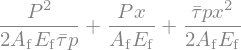

In [12]:
u_f_x = u_f.subs(var_subs)
u_f_x

## Visualization of results
We have derived a symbolic expression. But how to efficiently quantify it?
### Substitute for material parameters
Substitute for all the material and geometry parameters and the load P the value 1 and plot the curve

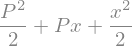

In [13]:
data_f = {L_b:1, p:1, E_f:1, A_f:1, tau:1}
u_f_x.subs(data_f)

Let us now prepare this function for interactive visualization

In [14]:
get_u_f_x = sp.lambdify((x, P), u_f_x.subs(data_f))
x_range = np.linspace(-1, 0, 11)
get_u_f_x(x_range, 1)


array([0.   , 0.005, 0.02 , 0.045, 0.08 , 0.125, 0.18 , 0.245, 0.32 ,
       0.405, 0.5  ])

**`sympy` explanation:** The obtained expression `u_f_x` contains symbols. To plot a function, the symbolic expression must be transformed to a quantifiable procedure. This is what `sp.lambdify` is doing. Its first argument  specifies the input variables for the generated "lambdified" function. In our case, it is `x` and `P`. The second argument is the expression to be evaluated, i.e. our solution with substituted data parameters `u_f_x.subs(data_f)`.

In [15]:
x_range = np.linspace(-2,0,100)
u_f_x_range = get_u_f_x(x_range, 1)

**`numpy` explanation:** To prepare an array of data we first generated an array `x_range` with 100 values in the range from (-2,0). Then the newly generated function `get_u_f_x` was called with these 100 values to get the corresponding value of displacement.

**`matplotlib` explanation:** Let us plot the result using the matplotlib package. It is possible to invoke simply the method

`plt.plot(x_range, u_f_range)`

with the first argument specifying the data points along the horizontal and second argument along the vertical axis, respectively.

But to prepare the later interaction with the model we directly use a more flexible plotting area with two subplots called `axes`. Such area is prepared using the function `plt.subplots(rows, cols)` which returns a figure and the `axes` for specified number of `rows` and `cols`. The returned `axes` objects can then be used to insert the data arrays as in the above `plt.plot` method. Below we construct a figure with two axes and plot into our displacement profile into the left diagram. We insert also a legend and fill the area between zero level and the data points with a value of opacity $0.2$. The second subplot axes is empty. It is prepared for the next diagram explained below.

<IPython.core.display.Javascript object>


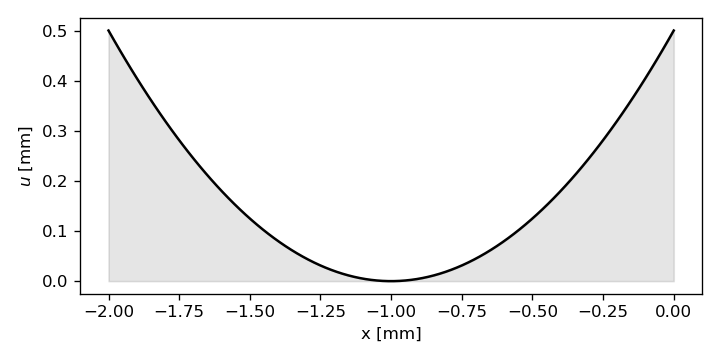

In [16]:
fig, ax_u1 = plt.subplots(1,1, figsize=(6,3), tight_layout=True)
ax_u1.plot(x_range, u_f_x_range, color='black');
ax_u1.set_xlabel('x [mm]'); ax_u1.set_ylabel('$u$ [mm]')
ax_u1.fill_between(x_range, u_f_x_range, color='black', alpha=0.1);

### Range of validity
The plot looks fine, but why do we get the displacement for $x < -1$? Let us recall that the debonded length was

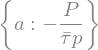

In [17]:
a_subs

so that $a = -1$. The range $x < a$ is beyond our applied model assumptions. We explicitly treated only the range $x \in (a, 0)$. Thus for nicer postprocessing we have to set $u_f(x) = 0, \; \forall x < a$ 

This can be readily done using the piecewise covering the domain of $x$ piece by piece.
\begin{align}
  u_\mathrm{fa} & = \left\{
  \begin{array}{ll}
  u_\mathrm{f}(x) & \iff x < 0 \land x > a, \; \mathrm{where} \; a = -\frac{P}{p\tau}, \\
  0      & \mathrm{otherwise}
  \end{array}
  \right.
\end{align}

In [18]:
u_fa_x = sp.Piecewise((u_f_x, x > var_subs[a]),
                      (0, x <= var_subs[a]))
u_fa_x
get_u_fa_x = sp.lambdify((x, P), u_fa_x.subs(data_f))

Plot the result in the right subplot `ax_u2` in the figure above

<IPython.core.display.Javascript object>


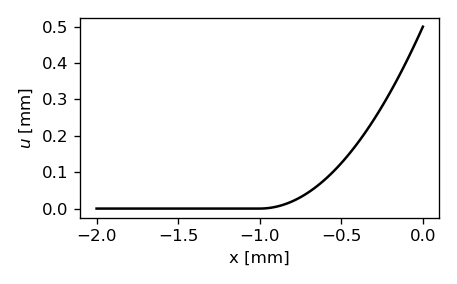

interactive(children=(FloatSlider(value=0.0, description='P', max=1.0, step=0.05), Output()), _dom_classes=('w…

In [19]:
u_fa_x_range = get_u_fa_x(x_range, 1)
fig, (ax_u2) = plt.subplots(1,1, figsize=(6,3), tight_layout=True)
line_u2, = ax_u2.plot(x_range, u_fa_x_range, color='black');
ax_u2.set_xlabel('x [mm]'); ax_u2.set_ylabel('$u$ [mm]')
def update(P):
    line_u2.set_ydata(get_u_fa_x(x_range, P))
ipw.interact(update, P=ipw.FloatSlider(min=0, max=1, step=0.05));

### Evaluate strains and stresses
With the known displacements at hand, we can directly calculate the strains as
\begin{align}
\varepsilon_\mathrm{f} = \frac{\mathrm{d} u_\mathrm{f}}{ \mathrm{d} x}
\end{align}

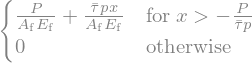

In [20]:
eps_f_x = sp.diff(u_fa_x,x)
eps_f_x

The stresses along the fiber are given as
\begin{align}
\sigma_\mathrm{f} = \frac{\varepsilon_\mathrm{f}}{ E_\mathrm{f} }
\end{align}

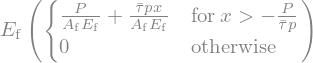

In [21]:
sig_f_x = E_f * eps_f_x
sig_f_x

The profile of shear stress along the bond zone is obtained as
\begin{align}
 \tau = \frac{\mathrm{d} \sigma}{\mathrm{d} x}
\end{align}

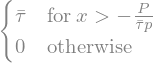

In [22]:
tau_x = sp.simplify(sig_f_x.diff(x) * A_f / p)
tau_x

### Plot the strains and stresses
Similarly to the callable function `get_u_fa_x` let us define the functions for the strains and stresses using the `sp.lambdify` generator 

In [23]:
get_eps_f_x = sp.lambdify((x, P), eps_f_x.subs(data_f))
get_sig_f_x = sp.lambdify((x, P), sig_f_x.subs(data_f))
get_tau_x = sp.lambdify((x, P), tau_x.subs(data_f))

To make the code for plotting shorter let us define a general procedure plotting and filling the curves and attaching the labels to a specified subplot in one call 

In [24]:
import bmcs_pullout_ui as poui

<IPython.core.display.Javascript object>


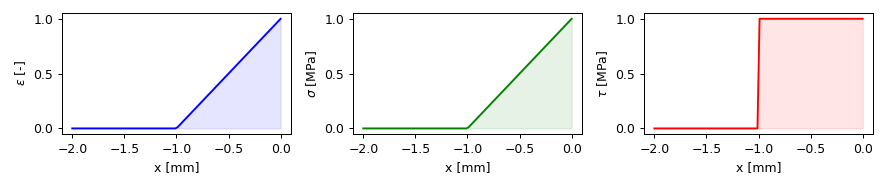

In [25]:
fig, (ax_eps, ax_sig, ax_tau) = plt.subplots(1,3, figsize=(10,3), tight_layout=True)
poui.plot_filled_var(ax_eps, x_range, get_eps_f_x(x_range,1 ), 
                color='blue',xlabel='x [mm]', ylabel=r'$\varepsilon$ [-]')
poui.plot_filled_var(ax_sig, x_range, get_sig_f_x(x_range,1),
                color='green', xlabel='x [mm]', ylabel=r'$\sigma$ [MPa]')
poui.plot_filled_var(ax_tau, x_range, get_tau_x(x_range,1),
                color='red', xlabel='x [mm]', ylabel=r'$\tau$ [MPa]');

## Pull-out curve
We have expressed the solution to find out what is the stress state within the bond zone $x \in L_\mathrm{b}$. However, to relate the test to the experimental observation we need to find the relation $P(w)$. Thus, we evaluate
\begin{align}
 w = u(x=0)
 = \displaystyle \frac{P^{2}}{2 A_\mathrm{f} E_\mathrm{f} p \tau}
\end{align}
Resolving this equation with respect to $P$ we obtain
\begin{align}
 P_{\mathrm{push}, \mathrm{pull}} = \pm \sqrt{ 2 A_\mathrm{f} E_\mathrm{f} p \tau w }
\end{align}

**`sympy` explanation:** In parallel let us use again the `subs` and `solve` provided in `sympy` to define the `P_push` and `P_pull` variables in the running `jupyter` kernel. As `solve` searches for zero point of the supplied equation we must transform the above equation into

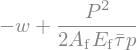

In [64]:
u_f_x.subs(x,0) - w

and then send it to `sp.solve`

In [67]:
Pw_pull = sp.solve(u_f_x.subs({x:0})-w, P)[0]
Pw_pull

Note that the obtained $P(w)$ covers both the pull-out and push-in case. If we supply the parameters defined above with unit stiffness, area and perimeter we obtain

In [68]:
data_f

In [70]:
Pw_pull.subs(data_f)

### Plot the pull-out curve
The symbolic expression must be transformed into a quantifiable form using `sp.lambdify`

In [71]:
get_Pw_pull = sp.lambdify(w, Pw_pull.subs(data_f))

Plotting is done using the same methods as above

<IPython.core.display.Javascript object>


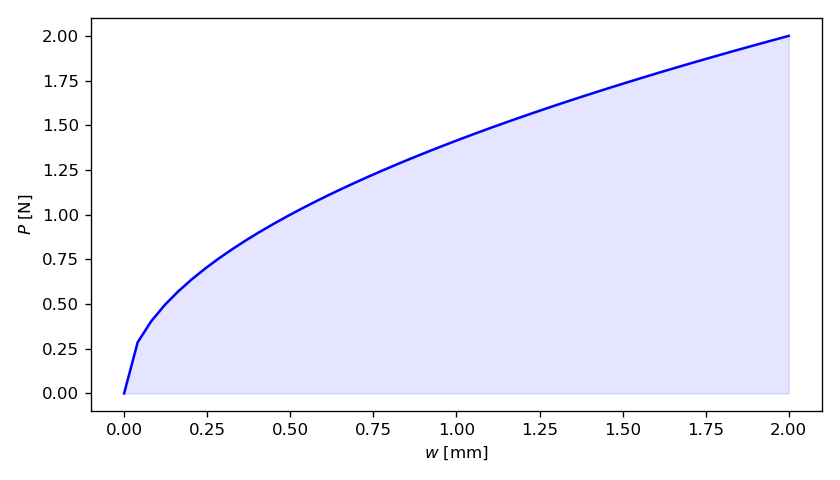

In [72]:
fig, ax_pull = plt.subplots(1,1, figsize=(7,4), tight_layout=True)
w_range = np.linspace(0,2,50)
poui.plot_filled_var(ax_pull, w_range, get_Pw_pull(w_range), 
                color='blue', xlabel='$w$ [mm]', ylabel=r'$P$ [N]');

## Displacement at the unloaded end
To see the difference between the displacement measured at $x = 0$ and $x = -L_\mathrm{b}$ let us provide a callable function evaluating $u_\mathrm{f}(x = -L_\mathrm{b})$

In [73]:
py_vars = ('w', 'tau', 'p', 'L_b', 'A_f', 'A_m', 'E_f', 'E_m')
map_py2sp = {py_var : globals()[py_var] for py_var in py_vars}
sp_vars = tuple(map_py2sp[py_var] for py_var in py_vars)

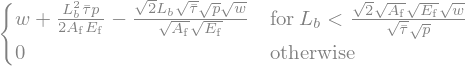

In [74]:
w_L_b = u_fa_x.subs(x, -L_b).subs(P, Pw_pull)
w_L_b

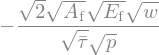

In [75]:
aw_pull = a_subs[a].subs(P, Pw_pull)
aw_pull

## Package the derived methods for later use

In [76]:
import traits.api as tr
class PO_LF_LM_RG(tr.HasTraits):
    get_Pw_pull = sp.lambdify(sp_vars, Pw_pull)
    get_aw_pull = sp.lambdify(sp_vars, aw_pull)
    get_w_L_b = sp.lambdify(sp_vars, w_L_b.subs(P, Pw_pull))
    get_u_fa_x = sp.lambdify((x,) + sp_vars, u_fa_x.subs(P, Pw_pull))
    get_u_ma_x = lambda x, *args: np.zeros_like(x)
    get_eps_f_x = sp.lambdify((x,) + sp_vars, eps_f_x.subs(P, Pw_pull))
    get_eps_m_x = lambda x, *args: np.zeros_like(x)
    get_sig_f_x = sp.lambdify((x,) + sp_vars, sig_f_x.subs(P, Pw_pull))
    get_sig_m_x = lambda x, *args: np.zeros_like(x)
    get_tau_x = sp.lambdify((x,) + sp_vars, tau_x.subs(P, Pw_pull))

## Interactive exploration
Now that we have finished the construction of the model we can track the process and explore the correspondence between the internal state and externally observed response

In [77]:
import bmcs_pullout_ui as poui
po = poui.ModelInteract(
    models=[PO_LF_LM_RG],
    w_max = 1.0,
    py_vars=list(py_vars),
    map_py2sp=map_py2sp
)

<IPython.core.display.Javascript object>


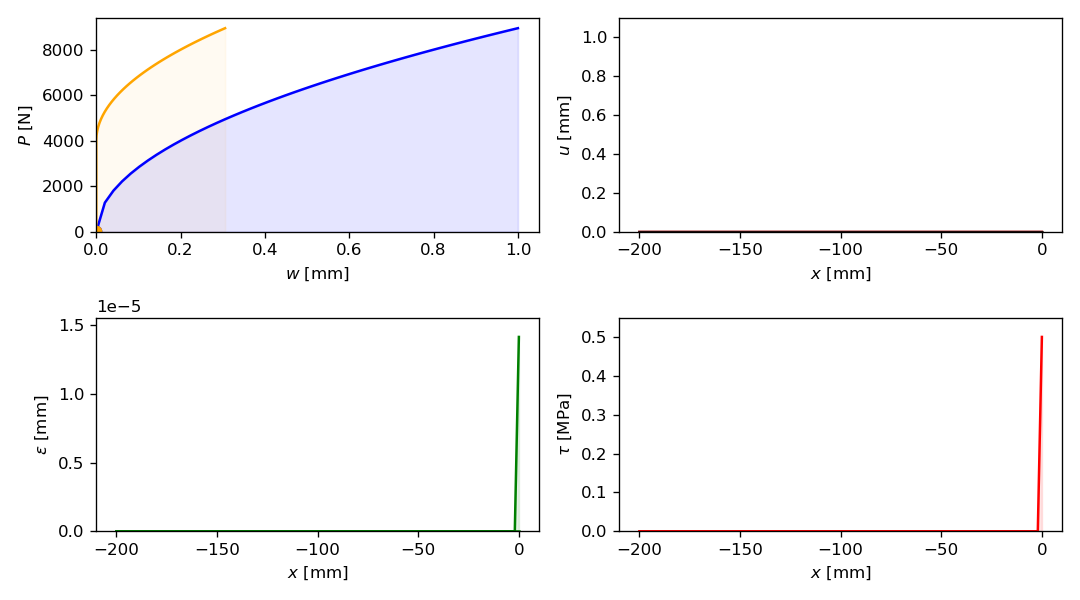

In [78]:
po.interact_fields()

## Let's learn from the model

Exercise the relation between $P$ and $\tau(x)$ and between $w$ and $\varepsilon(x)$.

 1. What is the meaning of the green area?
 2. What is the meaning of the red area?
 3. What is the meaning of the slope of the green curve?
 4. Is it possible to reproduce the shown RILEM test response using this "frictional" model?
 4. What is the role of debonded length $a$ in view of general non-linear simulation?
 5. When does the pull-out fail?
 5. What happends with $a$ upon unloading?

## Let's make a prediction
What happens if we substitute the parameters from the RILEM pull-out test?
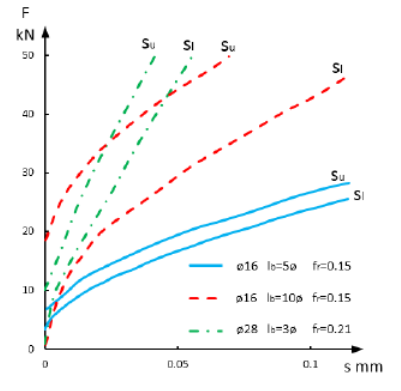

<IPython.core.display.Javascript object>


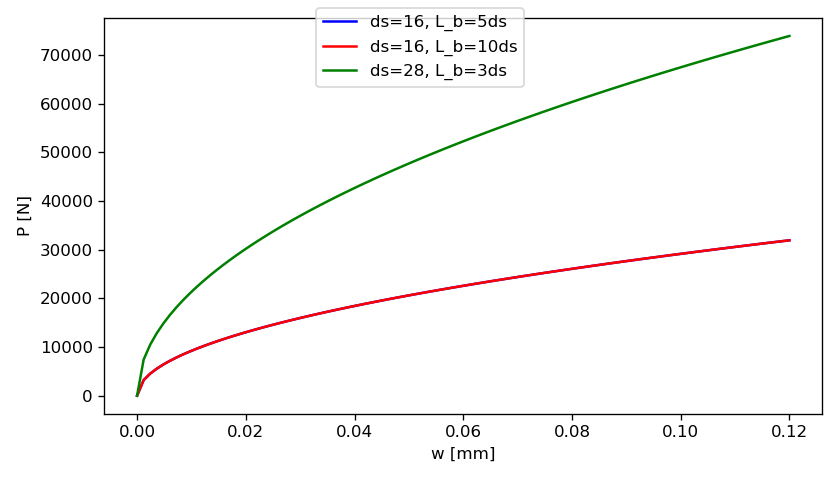

In [79]:
get_Pw_pull_args = sp.lambdify((w, A_f, E_f, tau, p, L_b), Pw_pull)
ds16 = 16  
ds28 = 28
w_range = np.linspace(0, 0.12, 100)
fig, ax = plt.subplots(1,1, figsize=(7,4), tight_layout=True)
ax.plot(w_range, get_Pw_pull_args(w_range, np.pi*(ds16/2)**2, 210000, 2, p=np.pi*ds16, L_b=5*ds16 ), 
        color='blue', label='ds=16, L_b=5ds')
ax.plot(w_range, get_Pw_pull_args(w_range, np.pi*(ds16/2)**2, 210000, 2, p=np.pi*ds16, L_b=10*ds16 ), 
        color='red', label='ds=16, L_b=10ds')
ax.plot(w_range, get_Pw_pull_args(w_range, np.pi*(ds28/2)**2, 210000, 2, p=np.pi*ds28, L_b=3*ds28 ), 
        color='green', label='ds=28, L_b=3ds')
ax.set_ylabel(r'P [N]'); ax.set_xlabel(r'w [mm]')
fig.legend(loc=9);